# Iris Flower Classification Project

In [2]:
#libraries importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dataset uploading
df = pd.read_csv('Iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Exploratory Data Analysis

In [4]:
#checking sum of missing values in each column
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#showing all numerical column
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
#seperating target and feature 
X=df.iloc[:,:-1] #feature
y=df.iloc[:,-1]  #target

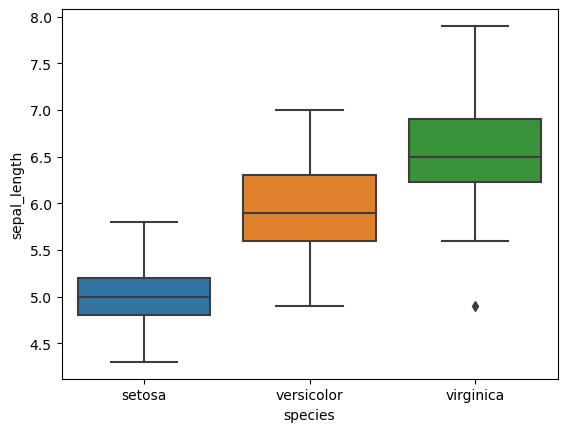

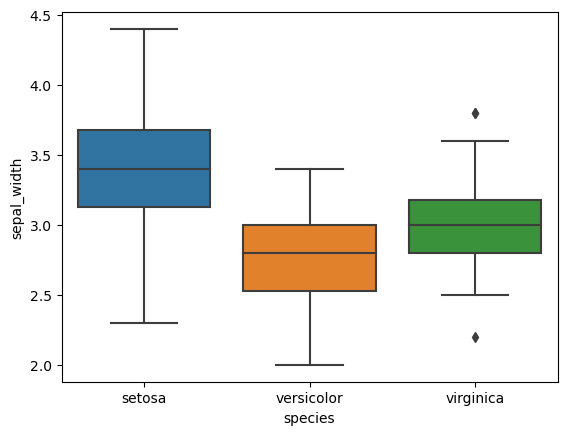

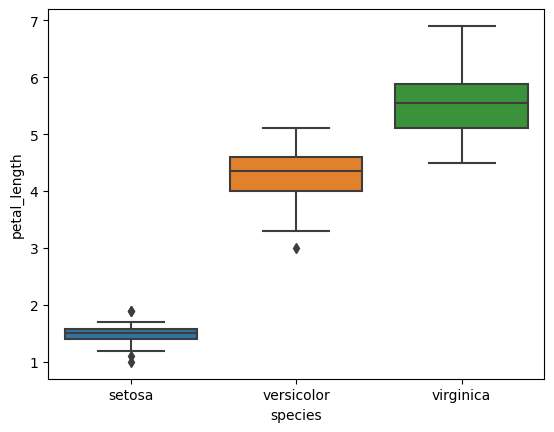

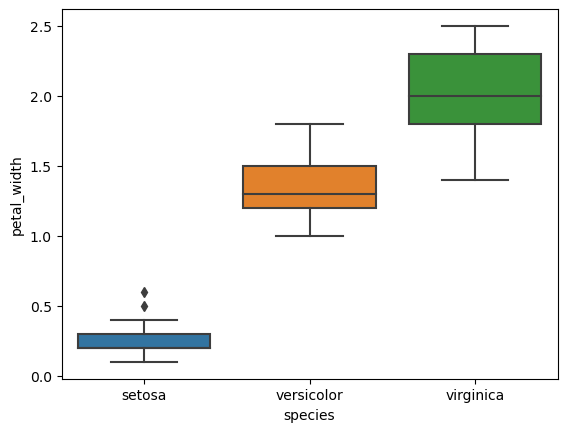

In [9]:
#checking outliers Boxplot
for col in X:
    plt.figure()
    sns.boxplot(data=df,x=y,y=col)
    plt.show()

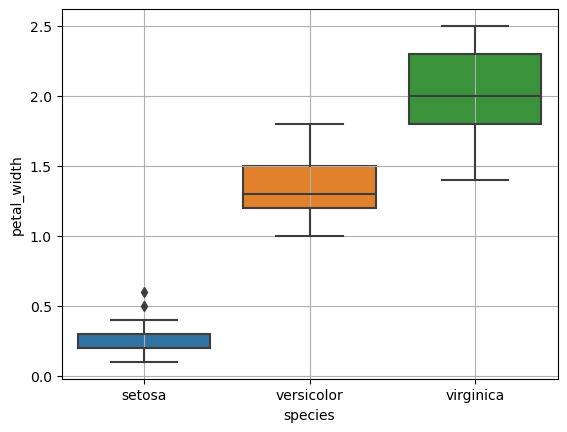

In [10]:
#checking outliers using boxplot
sns.boxplot(data=X,x=y,y='petal_width') #X-feature, y-target
plt.grid()
plt.show()

In [11]:
#removing outlier from datapoint
X[(X.petal_width >= 0.5) & (y == 'setosa')]

,sepal_length,sepal_width,petal_length,petal_width
23,5.1,3.3,1.7,0.5
43,5.0,3.5,1.6,0.6


In [12]:
X.drop([23,43],axis=0,inplace=True)
y.drop([23,43],axis=0,inplace=True)

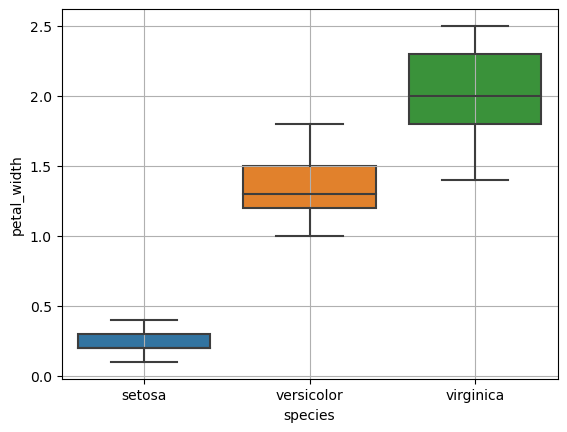

In [13]:
sns.boxplot(data=X,x=y,y='petal_width') #X-feature, y-target
plt.grid()
plt.show()

In [14]:
#checking skewness
#selecting numerical column
colname=X.columns
colname

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [15]:
#import 
from scipy.stats import skew

sepal_length
0.2887581351202791


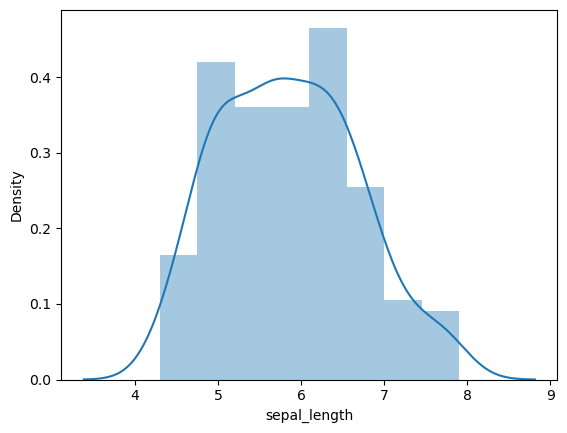

sepal_width
0.3569389976064577


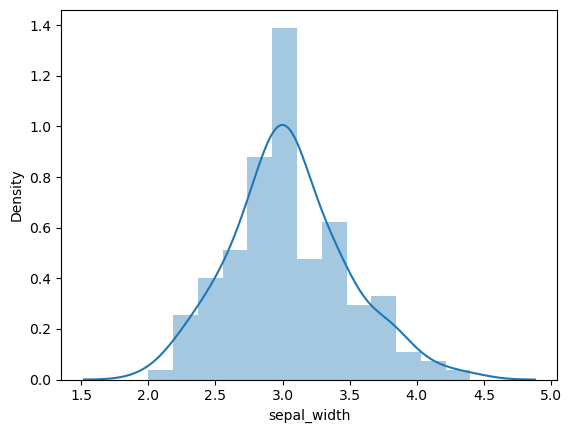

petal_length
-0.30317174856333257


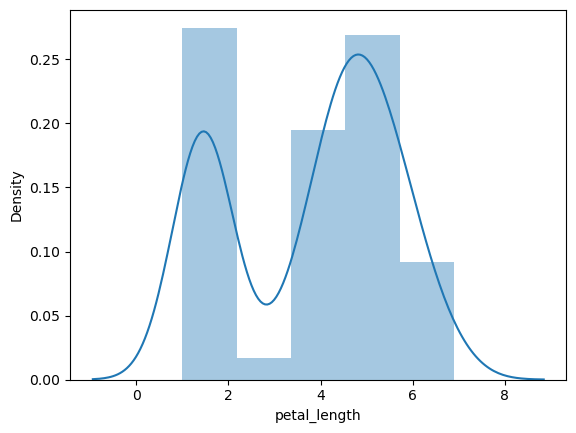

petal_width
-0.13082693621823602


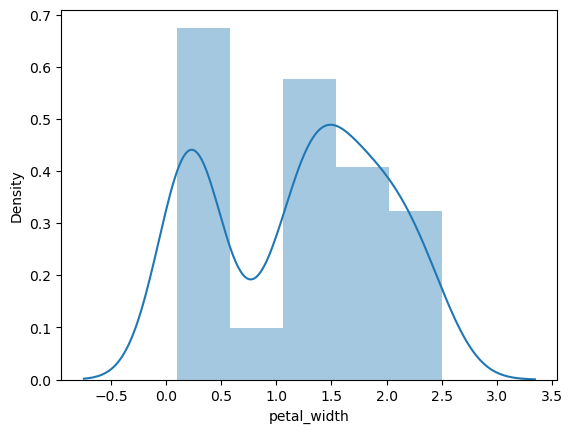

In [16]:
#using for loop to check skewness of all numeric column
for col in X[colname]:
    print(col)  #prints column name
    print(skew(X[col]))  #prints skewness of col
    plt.figure()
    sns.distplot(X[col])
    plt.show()

In [17]:
#convert categorical variables to numerical using Label Encoding
#importing label encoder
from sklearn.preprocessing import LabelEncoder

In [18]:
#object of label encoder
le = LabelEncoder()

In [19]:
#encoding
le.fit_transform(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
#splitting training and testing datas from the iris dataset
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
x_train.shape

(103, 4)

In [23]:
x_test.shape

(45, 4)

In [24]:
y_train.shape

(103,)

In [25]:
y_test.shape

(45,)

# Support Vector Machine

In [34]:
#support vector model
from sklearn.svm import SVC
#model building and training
model2=SVC(random_state=1)
model2.fit(x_train,y_train)

SVC(random_state=1)

In [35]:
#prediction
y_pred=model2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# Conclusion:
- Support Vector Machine (SVM) has the highest accuracy (0.96).
- support vector machine is good model for this dataset.